In [ ]:

"""
To illustrate how the sliding window algorithm works in a simple and intuitive way, 
we begin with a small synthetic image represented as a 4 × 5 intensity array. 
This example mimics a simplified PIV image, where pixel values represent grayscale 
intensity and a bright horizontal band corresponds to a free surface. 
Using a small array allows us to clearly track how the sliding window moves 
across the data, computes local intensity averages, and identifies the brightest 
continuous region while suppressing isolated noise. 


This step-by-step example provides a conceptual foundation before applying the algorithm to 
full-resolution experimental images.
"""

'\nTo illustrate how the sliding window algorithm works in a simple and intuitive way, \nwe begin with a small synthetic image represented as a 4 × 5 intensity array. \nThis example mimics a simplified PIV image, where pixel values represent grayscale \nintensity and a bright horizontal band corresponds to a free surface. \nUsing a small array allows us to clearly track how the sliding window moves \nacross the data, computes local intensity averages, and identifies the brightest \ncontinuous region while suppressing isolated noise. This step-by-step example \nprovides a conceptual foundation before applying the algorithm to \nfull-resolution experimental images.\n'

In [18]:
import numpy as np
import matplotlib.pyplot as plt

img = np.array([
    [10, 10, 10, 10, 10],
    [12, 12, 12, 12, 12],
    [80, 85, 90, 88, 82],  # bright horizontal band (surface)
    [15, 15, 15, 15, 15]
])

print("Image array:")
print(img)

Image array:
[[10 10 10 10 10]
 [12 12 12 12 12]
 [80 85 90 88 82]
 [15 15 15 15 15]]


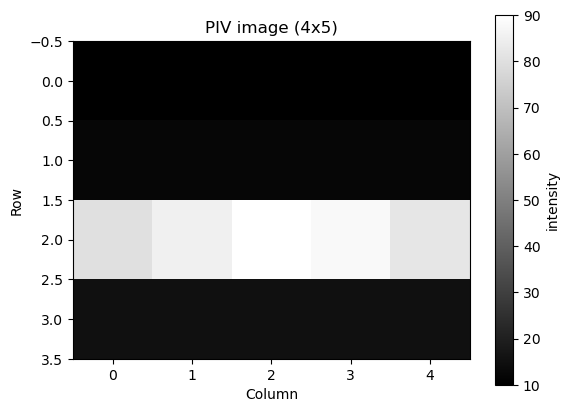

In [11]:
plt.imshow(img, cmap="gray")
plt.colorbar(label="intensity")
plt.title("PIV image (4x5)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

In [12]:
col = 2 # Column 2 in image
column = img[:, col]

print(f"\nAnalyzing column {col}:")
print(column)


Analyzing column 2:
[10 12 90 15]


In [13]:
# Sliding window
window_size = 1 # At each row, average row-1, row+1
max_avg = -np.inf
max_pos = None

for row in range(window_size, len(column) - window_size):
    window = column[row - window_size: row + window_size + 1]
    window_avg = np.mean(window)

    print(f"\nRow {row}")
    print(f" Window values: {window}")
    print(f" Window average: {window_avg}")

    if window_avg > max_avg:
        max_avg = window_avg
        max_pos = row
        print(" New maximum found!")

print("\nFinal result:")
print("Brightest window center row:", max_pos)
print("Max average intensity:", max_avg)



Row 1
 Window values: [10 12 90]
 Window average: 37.333333333333336
 New maximum found!

Row 2
 Window values: [12 90 15]
 Window average: 39.0
 New maximum found!

Final result:
Brightest window center row: 2
Max average intensity: 39.0


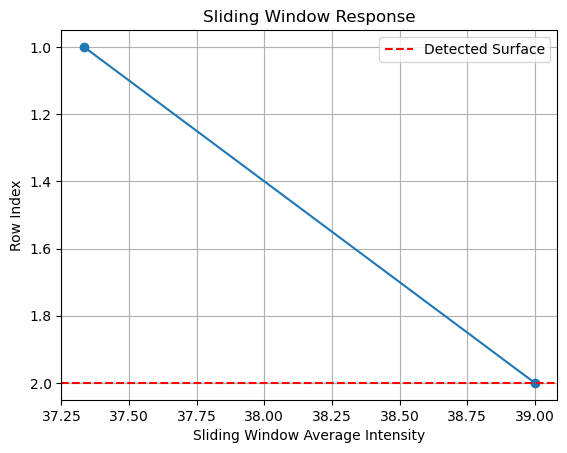

In [14]:
rows = []
averages = []

for row in range(window_size, len(column) - window_size):
    window = column[row - window_size : row + window_size + 1]
    averages.append(np.mean(window))
    rows.append(row)

plt.plot(averages, rows, marker='o')
plt.axhline(y=max_pos, color='r', linestyle='--', label="Detected Surface")
plt.gca().invert_yaxis()
plt.xlabel("Sliding Window Average Intensity")
plt.ylabel("Row Index")
plt.title("Sliding Window Response")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Using all columns in the image data (4 x 5)
surface_points = []

for col in range(img.shape[1]):
    column = img[:, col]
    max_avg = -np.inf
    max_pos = None

    for row in range(1, len(column) - 1):
        window_avg = np.mean(column[row-1:row+2])
        
        if window_avg > max_avg:
            max_avg = window_avg
            max_pos = row

    surface_points.append((col, max_pos))

print("\nDetected surface points:")
print(surface_points)



Detected surface points:
[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
